### 1. Importing the relevant libraries

In [ ]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
# CODE HERE

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [ ]:
# CODE HERE

In [2]:
df = pd.read_csv('C:/Users/Karthik/Downloads/1316540-Assignment_for_Linear_Regression/linear.csv.csv')

In [3]:
df['Brand']=df['Brand'].replace({'Mercedes-Benz':'Mercedes_Benz'})

#### Let's explore the top 5 rows of the df


In [ ]:
# CODE HERE

In [4]:
df.rename(columns={'Engine Type':'Engine_Type'},inplace=True)
df['Price'] = np.log(df.Price)
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes_Benz,8.974618,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes_Benz,9.495519,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
df.shape

(4345, 9)

## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

In [ ]:
# CODE HERE

In [6]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,9.404281,161.237284,2.790734,2006.550058
std,0.932192,105.705797,5.066437,6.719097
min,6.396930,0.000000,0.600000,1969.000000
25%,8.853523,86.000000,1.800000,2003.000000
50%,9.350102,155.000000,2.200000,2008.000000
75%,9.985068,230.000000,3.000000,2012.000000
max,12.611538,980.000000,99.990000,2016.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine_Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [8]:
df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.579341,0.042200,0.749302
Mileage,-0.579341,1.000000,0.020959,-0.668635
EngineV,0.042200,0.020959,1.000000,-0.022866
Year,0.749302,-0.668635,-0.022866,1.000000


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

In [ ]:
# CODE HERE

In [9]:
 k = df.isnull().sum()

In [10]:
k

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine_Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [6]:
# CODE HERE

In [11]:
df.drop(['Model'],axis = 1, inplace=True)

In [12]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991
1,Mercedes_Benz,8.974618,van,427,2.9,Diesel,yes,1999
2,Mercedes_Benz,9.495519,sedan,358,5.0,Gas,yes,2003
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011


In [13]:
df = df.dropna(axis=0)

#### 6. Let's check the descriptives without the missing values


In [ ]:
# CODE HERE

In [14]:
df.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,9.409665,163.572174,2.764586,2006.379627
std,0.933136,103.394703,4.935941,6.695595
min,6.396930,0.000000,0.600000,1969.000000
25%,8.853523,90.000000,1.800000,2003.000000
50%,9.350102,158.000000,2.200000,2007.000000
75%,9.994242,230.000000,3.000000,2012.000000
max,12.611538,980.000000,99.990000,2016.000000


### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

In [ ]:
# CODE HERE

<AxesSubplot:>

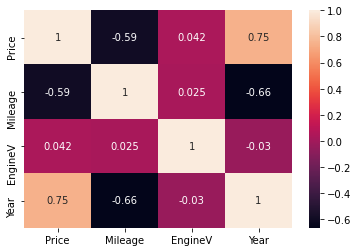

In [14]:
sns.heatmap(df.corr(),annot=True)

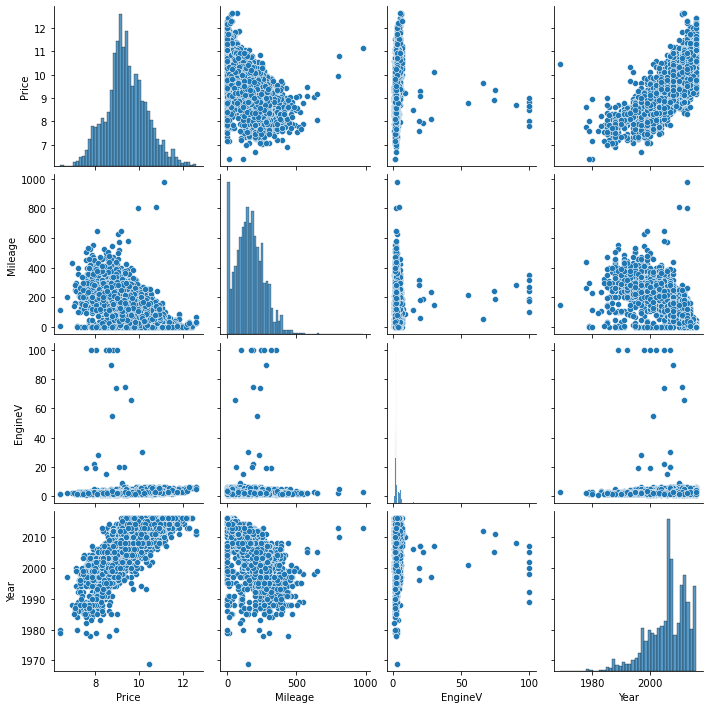

In [15]:
sns.pairplot(df)

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

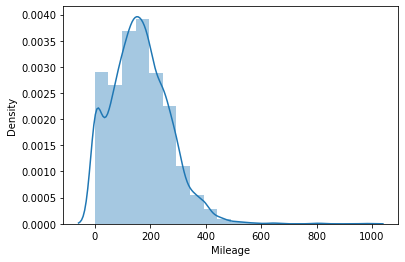

In [16]:
sns.distplot(df['Mileage'],bins = 20)

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


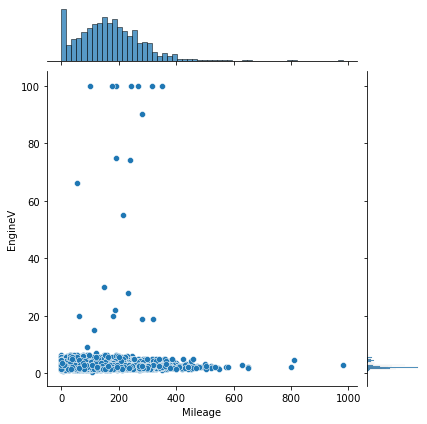

In [17]:
sns.jointplot(df['Mileage'],df['EngineV'])

### Dealing with outliers
Hint: Use IQR or Z Score

#### 8A. Identify the Outliers which are presented in `Price` Column

In [ ]:
# CODE HERE

In [15]:
q3,q1 = np.percentile(df.Price,[75,25])
price_IQR = q3-q1
price_upper_outliers = q3+1.5*price_IQR
price_lower_outliers = q1-1.5*price_IQR
price_outliers_ind = df[df['Price']>price_upper_outliers].index
#car_df[car_df['Price']<price_lower_outliers ]
df[df['Price']>price_upper_outliers]

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
5,Mercedes_Benz,12.206068,crossover,0,5.50,Petrol,yes,2016
62,BMW,11.798104,crossover,7,4.40,Petrol,yes,2015
131,Toyota,12.180755,crossover,0,4.50,Diesel,yes,2016
173,Mercedes_Benz,12.037654,other,1,4.70,Petrol,yes,2015
218,Toyota,11.813030,crossover,1,4.50,Diesel,yes,2011
348,Mercedes_Benz,12.206068,crossover,0,5.50,Petrol,yes,2016
438,Mercedes_Benz,12.180755,crossover,2,5.50,Petrol,yes,2016
594,Toyota,12.010666,crossover,0,4.50,Diesel,yes,2015
602,Mercedes_Benz,12.206068,crossover,0,5.50,Petrol,yes,2016
847,Mercedes_Benz,11.775282,sedan,37,4.70,Petrol,yes,2014


#### 8B. Remove the Outliers which are presented in `Price` Column

In [ ]:
# CODE HERE

In [16]:
df.drop(index=price_outliers_ind,axis=0,inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991
1,Mercedes_Benz,8.974618,van,427,2.9,Diesel,yes,1999
2,Mercedes_Benz,9.495519,sedan,358,5.0,Gas,yes,2003
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,9.350102,van,163,2.5,Diesel,yes,2008
4339,Toyota,9.792556,sedan,35,1.6,Petrol,yes,2014
4341,BMW,8.779557,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8.987197,sedan,194,2.0,Petrol,yes,1985


#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

In [ ]:
# CODE HERE

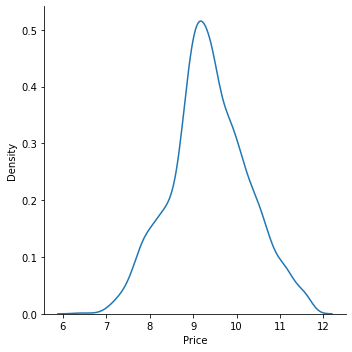

In [17]:
sns.displot(df.Price,kind = 'kde')

#### 9A. Same identify and remove the outliers in `Milage` column

In [ ]:
# CODE HERE

In [18]:
q3a,q1a = np.percentile(df.Mileage,[75,25])
mileage_IQR = q3a-q1a
mileage_upper_outliers = q3a+1.5*mileage_IQR
mileage_lower_outliers = q3a-1.5*mileage_IQR
mileage_outliers_ind = df[df['Mileage']>mileage_upper_outliers].index
df[df['Mileage']>mileage_upper_outliers]

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
6,BMW,8.716044,sedan,438,2.0,Gas,yes,1997
258,Volkswagen,7.824046,sedan,488,2.0,Petrol,yes,1991
284,Renault,8.496990,van,472,2.5,Diesel,yes,2000
396,Mercedes_Benz,7.882315,sedan,470,2.0,Gas,yes,1985
899,Volkswagen,8.779557,other,547,1.9,Diesel,yes,1998
922,Volkswagen,8.556414,van,442,2.4,Diesel,yes,1992
1198,Volkswagen,9.071078,other,520,2.5,Diesel,yes,1999
1393,Toyota,7.901007,sedan,550,1.6,Gas,yes,1989
1410,Volkswagen,8.496990,sedan,500,1.9,Diesel,yes,1995
1813,Mercedes_Benz,9.047821,van,630,2.9,Diesel,yes,1998


In [19]:
df.drop(index = mileage_outliers_ind, axis = 0, inplace=True)

In [20]:
df

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991
1,Mercedes_Benz,8.974618,van,427,2.9,Diesel,yes,1999
2,Mercedes_Benz,9.495519,sedan,358,5.0,Gas,yes,2003
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,9.350102,van,163,2.5,Diesel,yes,2008
4339,Toyota,9.792556,sedan,35,1.6,Petrol,yes,2014
4341,BMW,8.779557,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8.987197,sedan,194,2.0,Petrol,yes,1985


#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

In [ ]:
# CODE HERE

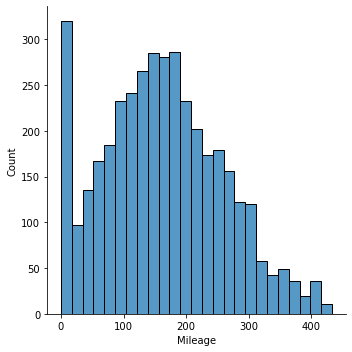

In [21]:
sns.displot(df.Mileage)

After removing the outliers Mileage column looks like normally distributed.

#### 10A. Identify and remove the outliers from `EngineV` column



In [ ]:
# CODE HERE

In [22]:
q3b,q1b=np.percentile(df.EngineV,[75,25])
EngineV_IQR=q3b-q1b
EngineV_upper_outliers=q3b+1.5*EngineV_IQR
EngineV_lower_outliers=q1b-1.5*EngineV_IQR
EngineV_outliers_ind=df[df['EngineV']>EngineV_upper_outliers].index
df[df['EngineV']>EngineV_upper_outliers]

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
2,Mercedes_Benz,9.495519,sedan,358,5.0,Gas,yes,2003
41,Mercedes_Benz,11.050890,crossover,86,5.5,Petrol,yes,2009
48,Mercedes_Benz,10.292146,sedan,134,5.0,Petrol,yes,2008
53,Mercedes_Benz,9.510445,sedan,317,5.0,Petrol,yes,2001
134,BMW,10.203592,sedan,137,5.0,Other,yes,2005
...,...,...,...,...,...,...,...,...
4261,Mercedes_Benz,10.915088,crossover,120,5.5,Petrol,yes,2008
4265,Mercedes_Benz,10.221941,crossover,152,6.3,Petrol,yes,2007
4278,Mercedes_Benz,10.292146,crossover,253,5.0,Petrol,yes,2003
4297,Mercedes_Benz,10.106428,sedan,163,5.5,Gas,yes,2007


In [23]:
df.drop(index = EngineV_outliers_ind, axis=0, inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991
1,Mercedes_Benz,8.974618,van,427,2.9,Diesel,yes,1999
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011
7,Audi,9.560997,vagon,200,2.7,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
4338,Volkswagen,9.350102,van,163,2.5,Diesel,yes,2008
4339,Toyota,9.792556,sedan,35,1.6,Petrol,yes,2014
4341,BMW,8.779557,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8.987197,sedan,194,2.0,Petrol,yes,1985


#### 10B. Check the distribution plot after deleting the outliers and say something about it.

In [16]:
# CODE HERE

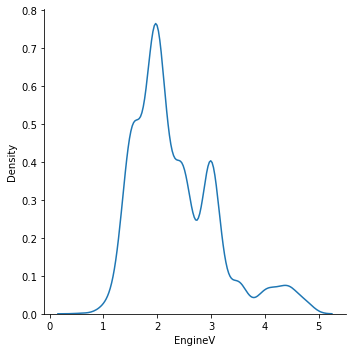

In [24]:
sns.displot(df.EngineV, kind = 'kde')

#### 10C. Perform Lable & One-Hot Encoding For the Categorical Variable

In [ ]:
# CODE HERE

In [25]:
df['Registration'] = df['Registration'].replace({'yes':1,'no':0})

In [26]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,1,1991
1,Mercedes_Benz,8.974618,van,427,2.9,Diesel,1,1999
3,Audi,10.043249,crossover,240,4.2,Petrol,1,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,1,2011
7,Audi,9.560997,vagon,200,2.7,Diesel,1,2006


In [27]:
df = pd.get_dummies(df,columns = ['Engine_Type','Body','Brand'])

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


In [ ]:
#CODE HERE

In [28]:
ss=StandardScaler()
ss_df=ss.fit_transform(df)
ss_df=pd.DataFrame(ss_df,columns=df.columns)
Vif=pd.DataFrame()
Vif['variables']=['Mileage','EngineV','Registration','Year']
data=ss_df.iloc[:,1:5]
Vif['VIF_Factor']=[vif(data.values,i) for i in range(4)]
Vif

,variables,VIF_Factor
0,Mileage,1.837648
1,EngineV,1.001469
2,Registration,1.081851
3,Year,1.835988


In [29]:
col=list(df.columns[1:])
sum=''
for i in range(len(col)):
    if i ==0:
        sum=sum+col[i]
    else:
        sum=sum+'+'+col[i]
sum

'Mileage+EngineV+Registration+Year+Engine_Type_Diesel+Engine_Type_Gas+Engine_Type_Other+Engine_Type_Petrol+Body_crossover+Body_hatch+Body_other+Body_sedan+Body_vagon+Body_van+Brand_Audi+Brand_BMW+Brand_Mercedes_Benz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen'

### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [ ]:
#CODE HERE

In [30]:
import statsmodels.formula.api as smf
ols_model=smf.ols(formula='Price~'+sum,data=df).fit()

#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

In [ ]:
# CODE HERE

In [31]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1575.
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:27:51   Log-Likelihood:                -826.58
No. Observations:                3780   AIC:                             1691.
Df Residuals:                    3761   BIC:                             1810.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -95.6719      1.391    -68.775      0.000     -98.399     -92.944
Mileage                -0.0012   7.51e-05    -16.621      0.000      -0.001      -0.001
EngineV                 0.2570      0.008     30.479      0.000       0.240       0.274
Registration            0.8981      0.018     49.197      0.000       0.862       0.934
Year                    0.0784      0.001     72.679      0.000       0.076       0.081
Engine_Type_Diesel    -23.8328      0.350    -68.172      0.000     -24.518     -23.147
Engine_Type_Gas       -23.9668      0.347    -69.156      0.000     -24.646     -23.287
Engine_Type_Other     -23.9201      0.349    -68.485      0.000     -24.605     -23.235
Engine_Type_Petrol    -23.9522      0.347    -69.019      0.000     -24.633     -23.272
Body_crossover        -15.6776      0.234    -67.135      0.000     -16.135     -15.220
Body_hatch            -16.0274      0.230    -69.576      0.000     -16.479     -15.576
Body_other            -15.9269      0.232    -68.532      0.000     -16.383     -15.471
Body_sedan            -15.9553      0.231    -68.925      0.000     -16.409     -15.501
Body_vagon            -15.9930      0.232    -68.808      0.000     -16.449     -15.537
Body_van              -16.0917      0.233    -68.933      0.000     -16.549     -15.634
Brand_Audi            -13.4637      0.199    -67.694      0.000     -13.854     -13.074
Brand_BMW             -13.3892      0.199    -67.392      0.000     -13.779     -13.000
Brand_Mercedes_Benz   -13.4363      0.199    -67.595      0.000     -13.826     -13.047
Brand_Mitsubishi      -13.9371      0.199    -70.006      0.000     -14.327     -13.547
Brand_Renault         -14.0739      0.200    -70.407      0.000     -14.466     -13.682
Brand_Toyota          -13.6811      0.200    -68.457      0.000     -14.073     -13.289
Brand_Volkswagen      -13.6905      0.199    -68.727      0.000     -14.081     -13.300
==============================================================================
Omnibus:                      682.466   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12535.027
Skew:                           0.309   Prob(JB):                         0.00
Kurtosis:                      11.900   Cond. No.                     2.18e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 13A. Feature Selection using with Forward Selection

In [ ]:
#CODE HERE

In [32]:
features=df.columns[1:3]
for i in features:
    fs1=smf.ols(formula='Price~ {} '.format(i),data=ss_df).fit()
    print('Price~ {} {} {} {} '.format(i,'\np-value',np.round(fs1.pvalues,4),'\n-----------'))  
    print('R2',np.round(fs1.rsquared))

Price~ Mileage 
p-value Intercept    1.0
Mileage      0.0
dtype: float64 
----------- 
R2 0.0
Price~ EngineV 
p-value Intercept    1.0
EngineV      0.0
dtype: float64 
----------- 
R2 0.0


In [33]:
features=df.columns[2:3]
for i in features:
    fs2=smf.ols(formula='Price~Mileage+{} '.format(i),data=ss_df).fit()
    print('Price~Mileage+ {} {} {} {} '.format(i,'\np-value',np.round(fs2.pvalues,4),'\n-----------'))
    print('R2',fs2.rsquared)

Price~Mileage+ EngineV 
p-value Intercept    1.0
Mileage      0.0
EngineV      0.0
dtype: float64 
----------- 
R2 0.5286314992303495


#### 13B. Feature Selection using with Backward Selection

In [ ]:
###CODEHERE

In [34]:
be1=smf.ols(formula='Price~Mileage+EngineV',data=ss_df).fit()
print('Price~ Mileage+EngineV {} {} {} '.format('\np-value',np.round(be1.pvalues,4),'\n-----------'))
print('R2',be1.rsquared_adj)

Price~ Mileage+EngineV 
p-value Intercept    1.0
Mileage      0.0
EngineV      0.0
dtype: float64 
----------- 
R2 0.5283818998124148


In [35]:
be1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2118.
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:31:53   Log-Likelihood:                -3942.1
No. Observations:                3780   AIC:                             7890.
Df Residuals:                    3777   BIC:                             7909.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.576e-16      0.011   2.31e-14      1.000      -0.022       0.022
Mileage       -0.6145      0.011    -54.975      0.000      -0.636      -0.593
EngineV        0.4090      0.011     36.592      0.000       0.387       0.431
==============================================================================
Omnibus:                      561.093   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.019
Skew:                          -0.909   Prob(JB):                    2.77e-243
Kurtosis:                       4.947   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
###Interpretations

#### 14. Explain about Assumption of errors and predictors


#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [ ]:
###CODEHERE

In [36]:
from sklearn.model_selection import train_test_split
x=ss_df[col]
y=ss_df.iloc[:,0:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [ ]:
###CODEHERE

In [37]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr_fit=mlr.fit(x_train,y_train)
print('Train Data R-score:',mlr.score(x_train,y_train))
y_pred_lr =mlr.predict(x_test)
print('Test Data R-score:',mlr.score(x_test,y_test))

Train Data R-score: 0.8800335691439627
Test Data R-score: 0.8931403468635389


#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [ ]:
###CODEHERE

In [38]:
from sklearn.linear_model import Lasso
mlr_lasso=Lasso(alpha=0.01)
mlr_lasso.fit(x_train,y_train)
print('Train Data R-score:',mlr.score(x_train,y_train))
y_pred_lasso=mlr_lasso.predict(x_test)
print('Test Data R-score:',np.round(mlr_lasso.score(x_test,y_test),4))

Train Data R-score: 0.8800335691439627
Test Data R-score: 0.8922


#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [ ]:
###CODEHERE

In [39]:
from sklearn.linear_model import Ridge
mlr_ridge=Ridge(alpha=1)
mlr_ridge.fit(x_train,y_train)
print('Train Data R-score:',mlr_ridge.score(x_train,y_train))
y_pred_ridge=mlr_ridge.predict(x_test)
mlr_ridge.score(x_test,y_test)
print('Test Data R-score:',mlr_ridge.score(x_test,y_test))

Train Data R-score: 0.8800334945654859
Test Data R-score: 0.893134287698126


### Residual Analysis

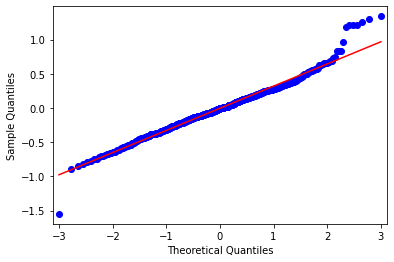

In [40]:
import statsmodels.api as sm
arr_lasso=y_test.Price-y_pred_lasso
fg=sm.qqplot(arr_lasso,line='s')

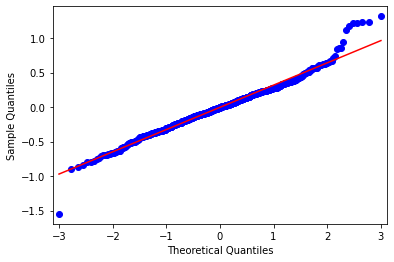

In [41]:
arr_ridge=y_test.Price-y_pred_ridge.flatten()
arr=arr_ridge
fg=sm.qqplot(arr_ridge,line='s')

### Give the Conclusions about the Model fits for What you Observe.

In [ ]:
### Interpretations